In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
import patsy as ps

In [23]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [24]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [25]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


NameError: name 'plt' is not defined

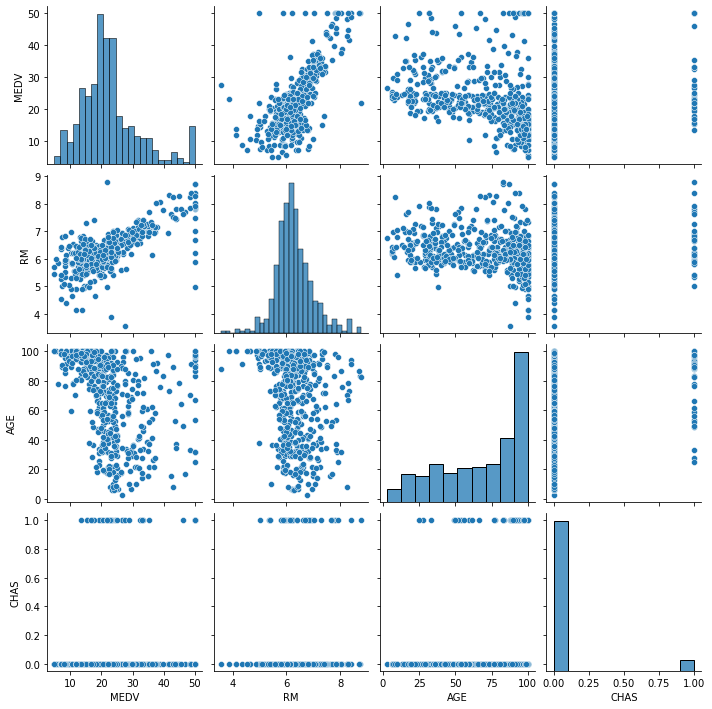

In [15]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

In [17]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


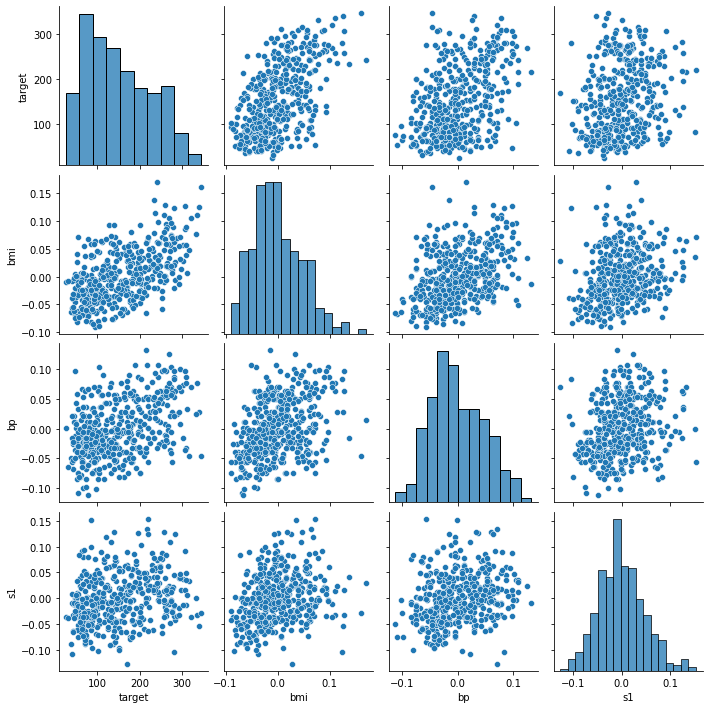

In [18]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [20]:
from sklearn.datasets import fetch_california_housing

In [21]:
cali = fetch_california_housing()

In [22]:
ca

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [23]:
cali.target_names

['MedHouseVal']

In [24]:
caliX = pd.DataFrame(cali.data, columns = cali.feature_names)
caliY = pd.DataFrame(cali.target, columns = cali.target_names)
calidf = pd.concat([caliX, caliY], axis = 1)

In [26]:
calidf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
import patsy as ps
calidf_scaled = ps.dmatrix("MedHouseVal+scale(Population)+MedInc+HouseAge+scale(AveRooms) + 0", data=calidf,return_type = 'dataframe')

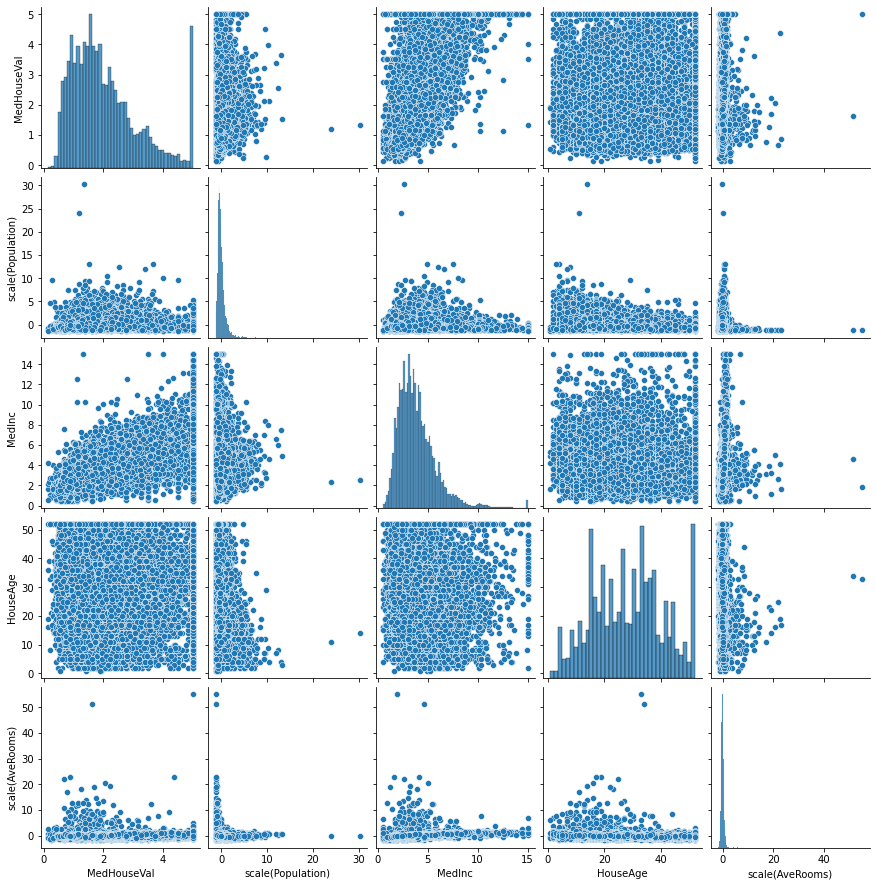

In [38]:
sns.pairplot(calidf_scaled)

In [39]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
            n_samples = 50, n_features = 1 , bias = 100, noise = 10, coef = True, random_state = 1)

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)


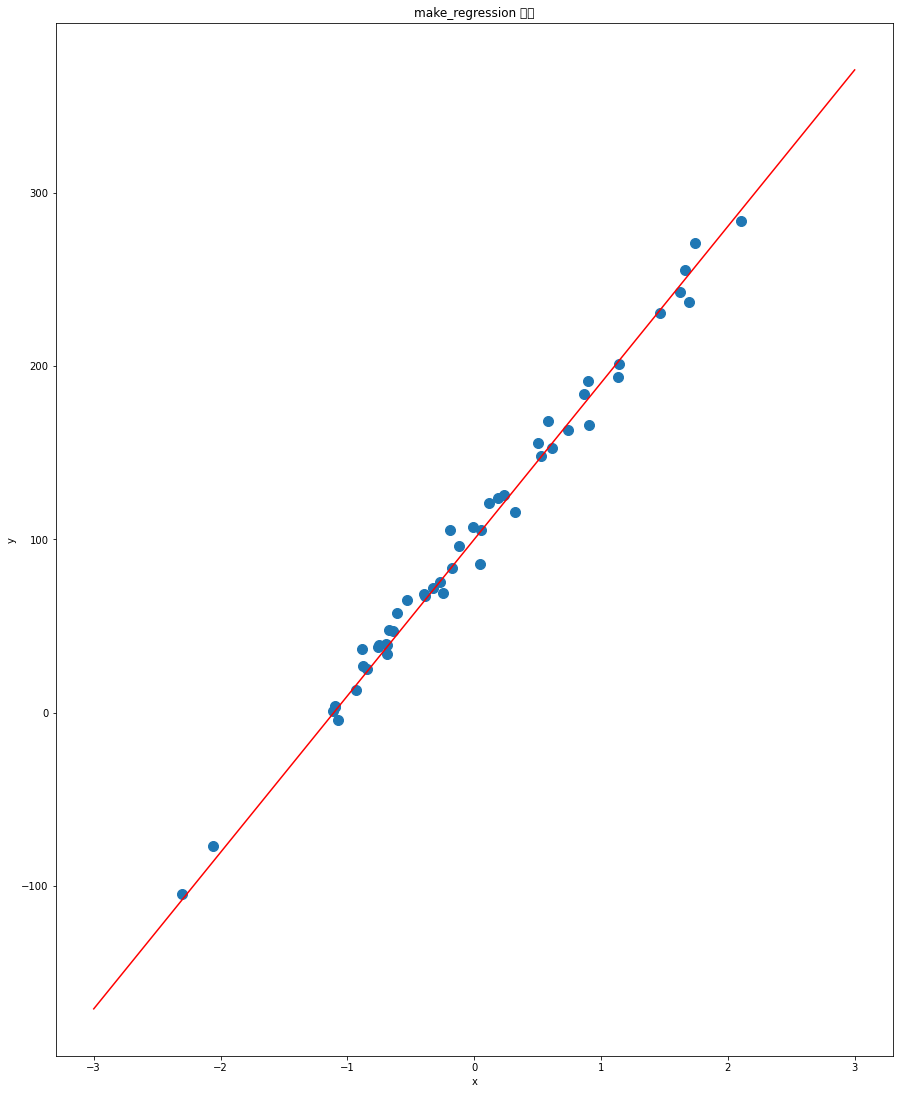

In [44]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.figure(figsize=(15,19))
plt.plot(xx,y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

# [실습] make_regression2

In [54]:
def make_regression2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    X = np.random.normal(size = n_samples)
    w = 100 * np.random.normal(size=1)[0] # noise에 영향을 적게 받으라고 크게 만든 것
    y0 = w*X + bias
    e = np.random.normal(scale =noise, size = n_samples)
    y = y0 + e
    return X, y, w

# 독립변수가 2개인 make_regression

In [56]:
X, y, w = make_regression(n_samples = 300, n_features = 2, noise = 10, coef = True, random_state = 0)

In [57]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

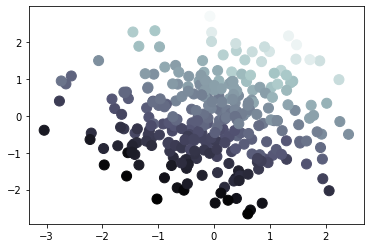

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)

In [62]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

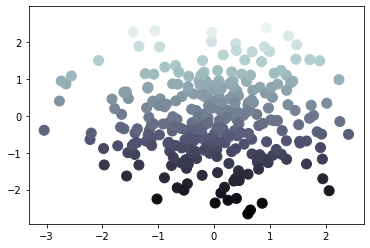

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)

In [64]:
X, y, w = make_regression(n_samples = 300, n_features =2, effective_rank = 1, noise = 0 , coef = True, random_state = 0, tail_strength=0  )


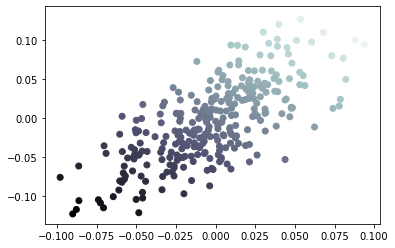

In [66]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = mpl.cm.bone)

In [ ]:
start : number, optional
stop : number
step : number, optional
dtype : dtype


In [67]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

In [69]:
help(sm.add_constant)

Help on function add_constant in module statsmodels.tools.tools:

add_constant(data, prepend=True, has_constant='skip')
    Add a column of ones to an array.
    
    Parameters
    ----------
    data : array_like
        A column-ordered design matrix.
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if any column has a constant value. Using 'add' will add a
        column of 1s if a constant column is present.
    
    Returns
    -------
    array_like
        The original values with a constant (column of ones) as the first or
        last column. Returned value type depends on input type.
    
    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the added
    column

In [70]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [71]:
w

array(86.44794301)

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)
model.predict([[-2], [-1], [0], [1], [2]])

[99.79150869] [[86.96171201]]


array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [78]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [82]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [95]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [113]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [86]:
X0

array([[ 0.23249456],
       [-0.03869551],
       [ 0.5505375 ],
       [ 0.50318481],
       [ 2.18697965],
       [-0.0731127 ],
       [-0.26788808],
       [-1.62743834],
       [ 0.53035547],
       [ 0.16938243],
       [-0.64691669],
       [ 0.51292982],
       [ 0.86888616],
       [ 0.87616892],
       [-0.10174587],
       [ 1.96710175],
       [ 1.23616403],
       [ 0.79280687],
       [-0.0126646 ],
       [-1.09491185],
       [ 1.04444209],
       [ 0.28558733],
       [ 0.59357852],
       [ 1.74481176],
       [-1.37311732],
       [-0.87785842],
       [ 0.90085595],
       [-0.11044703],
       [-0.07557171],
       [ 1.16033857],
       [-1.23005814],
       [ 0.74055645],
       [-0.29664115],
       [-1.85798186],
       [ 0.2135339 ],
       [-2.02220122],
       [ 0.37756379],
       [ 0.81095167],
       [ 1.2245077 ],
       [-0.22232814],
       [ 2.19069973],
       [-0.67124613],
       [ 0.4202822 ],
       [-1.07296862],
       [-1.14434139],
       [ 0

In [90]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          8.17e-182
Time:                        23:37:49   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [91]:
help(result.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.regression.linear_model.OLSResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array_like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    *args
        Additional arguments to pass to the model, see the
        predict method of the model for the details.
    **kwargs
        Additional keywords arguments to pass to the model, see the
        predict method of the model for th

In [100]:
x = np.array([-2, -1, 0, 1, 2])

In [104]:
xnew = sm.add_constant(x)

In [102]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly c

In [105]:
result.predict(xnew)

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [110]:
type(result.resid)

pandas.core.series.Series

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current

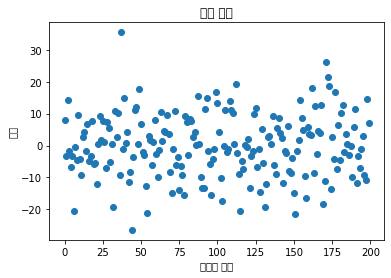

In [109]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

In [111]:
result.resid.sum()

7.034373084024992e-13

In [114]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

# 보스턴 집 값 예측

In [115]:
from sklearn.datasets import load_boston
boston = load_boston()

In [116]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [122]:
dfX0 = pd.DataFrame(boston.data, columns = boston.feature_names)
dfY = pd.DataFrame(boston.target, columns = ["MEDV"])
df = pd.concat([dfX0, dfY], axis = 1)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [124]:
model = sm.OLS.from_formula("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data = df)

In [125]:
result = model.fit()

In [127]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        00:09:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

# 당뇨병 예측

In [129]:
from sklearn.datasets import load_diabetes

In [130]:
diabetes = load_diabetes()

In [131]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [141]:
dfX0 = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
dfY = pd.DataFrame(diabetes.target, columns = ["PROG"])
df = pd.concat([dfX0, dfY], axis = 1)

In [142]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,PROG
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [148]:
formula = "PROG ~ "
for name in diabetes.feature_names:
    formula = formula + name
    formula = formula + "+"
formula = formula[:-1]

In [149]:
model = sm.OLS.from_formula(formula, data = df)

In [150]:
result = model.fit()

In [151]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PROG   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           3.83e-62
Time:                        02:12:28   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0

In [152]:
help(np.dot)

Help on function dot in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
      and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : 

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        10:49:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
import scipy as sp
A = np.eye(4)
b = np.ones(4)
x = sp.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

In [20]:
A = sp.linalg.hilbert(4)
np.linalg.cond(A)
sp.linalg.solve(A, b)
sp.linalg.solve(A + 0.0001 * np.eye(4), b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

In [37]:
# for col in dfX.columns :
#     print(f'{col} : {len(df[col].value_counts())}')


Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
 

In [21]:
dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [26]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        11:55:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

In [38]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


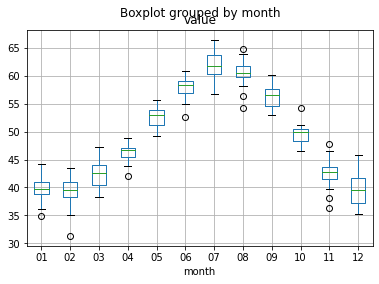

In [39]:
df_nottem.boxplot("value", "month")
plt.show()

In [40]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          2.96e-125
Time:                        13:16:25   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [41]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          2.96e-125
Time:                        13:18:44   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

In [42]:
df4 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [69]:
for col in df4.columns :
    df4[col] = df4[col].astype('object')

In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      object
 1   x2      4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [71]:
ps.dmatrix("x1:x2 + 0", data = df4)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

In [49]:
ps.dmatrix("x1*x2", data = df4)

DesignMatrix with shape (4, 4)
  Intercept  x1[T.B]  x2[T.Y]  x1[T.B]:x2[T.Y]
          1        0        0                0
          1        1        0                0
          1        0        1                0
          1        1        1                1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [59]:
df5 = pd.DataFrame(np.array([[1,2],[3,4],[5,6],[7,8]]), columns=["x1", "x2"])

In [72]:
ps.dmatrix("C(x1):C(x2)", data = df5)

DesignMatrix with shape (4, 16)
  Columns:
    ['Intercept',
     'C(x2)[T.4]',
     'C(x2)[T.6]',
     'C(x2)[T.8]',
     'C(x1)[T.3]:C(x2)[2]',
     'C(x1)[T.5]:C(x2)[2]',
     'C(x1)[T.7]:C(x2)[2]',
     'C(x1)[T.3]:C(x2)[4]',
     'C(x1)[T.5]:C(x2)[4]',
     'C(x1)[T.7]:C(x2)[4]',
     'C(x1)[T.3]:C(x2)[6]',
     'C(x1)[T.5]:C(x2)[6]',
     'C(x1)[T.7]:C(x2)[6]',
     'C(x1)[T.3]:C(x2)[8]',
     'C(x1)[T.5]:C(x2)[8]',
     'C(x1)[T.7]:C(x2)[8]']
  Terms:
    'Intercept' (column 0), 'C(x1):C(x2)' (columns 1:16)
  (to view full data, use np.asarray(this_obj))

# 부분회귀

In [73]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

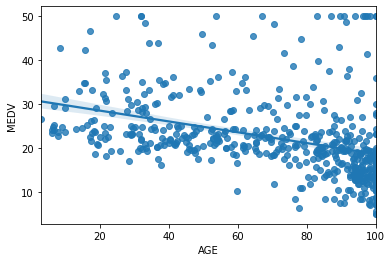

In [74]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

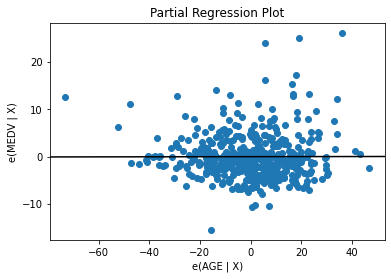

In [75]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

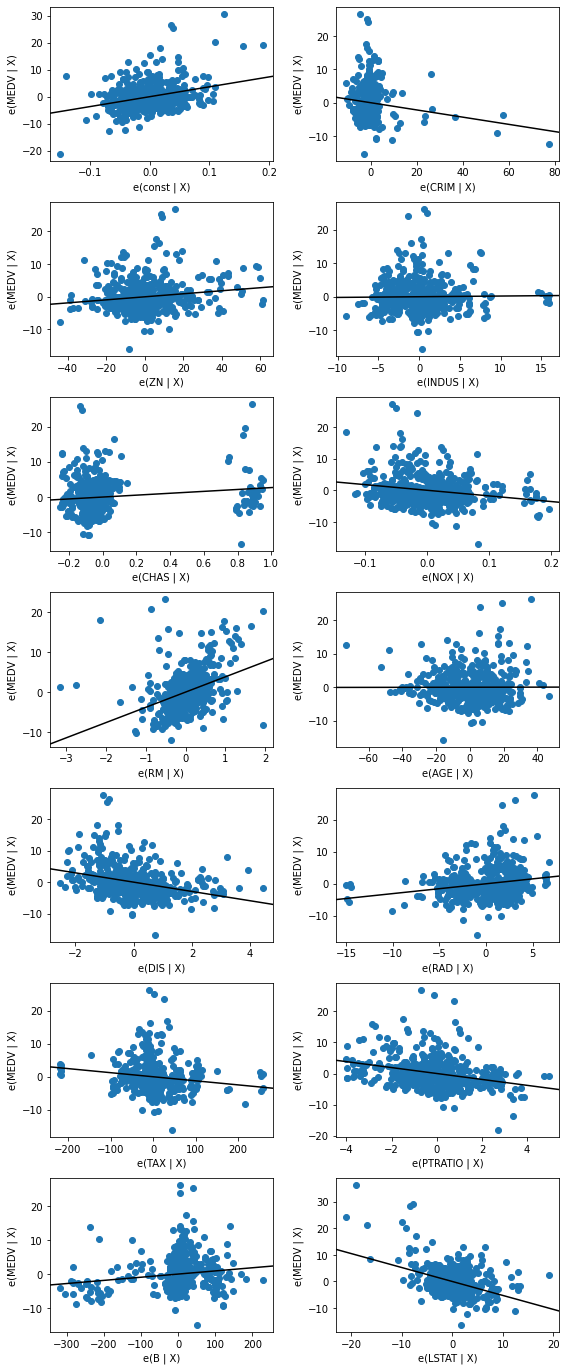

In [76]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

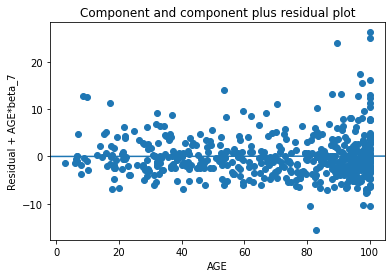

In [77]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

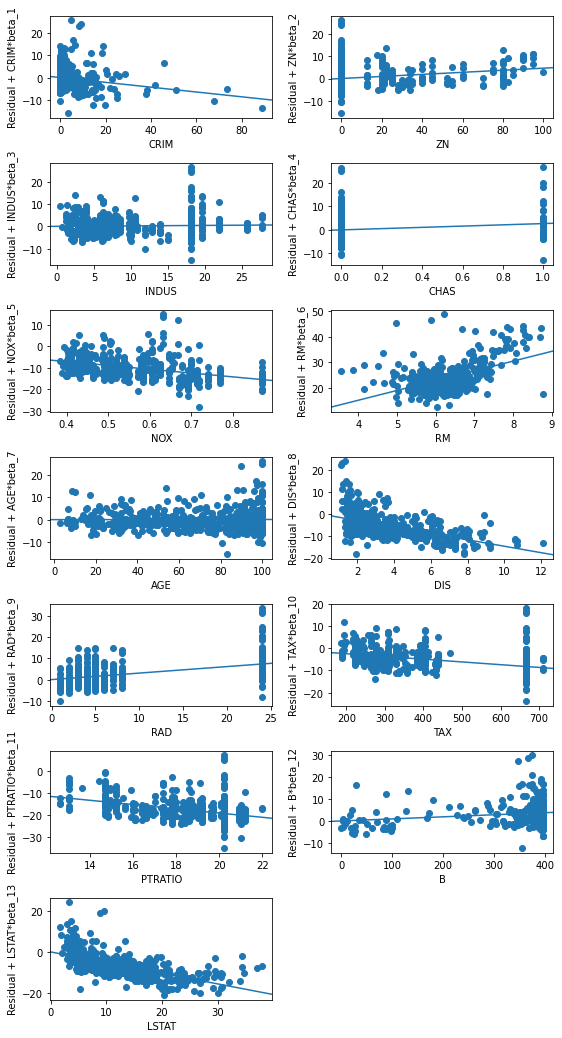

In [78]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

<Figure size 1080x720 with 0 Axes>

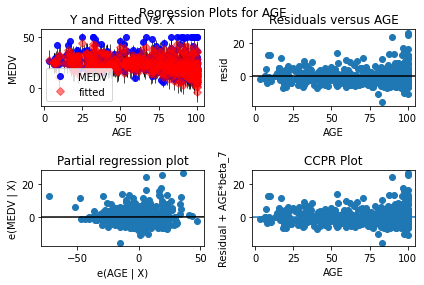

In [82]:
plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(result_boston, "AGE")
# plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()